In [9]:
import matplotlib.pyplot as plt
import ex_1.main as main

In [10]:
learning_rates_results = "ex_1/resources/learning_rates.txt"

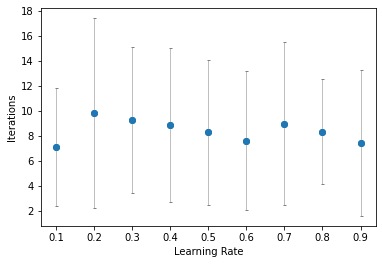

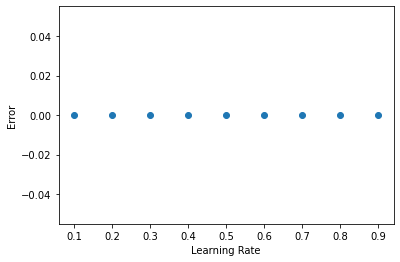

In [11]:
learn_rates, it, it_dev, err, err_dev = main.parse_rates_results(learning_rates_results)

#plot learning rates vs iterations with error and learning raes vs error with error
plt.figure(1)
plt.xlabel("Learning Rate")
plt.ylabel("Iterations")
plt.scatter(learn_rates, it)
plt.errorbar(learn_rates, it, yerr=it_dev, ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")
plt.figure(2)
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.scatter(learn_rates, err)